<a href="https://colab.research.google.com/github/TheKoray18/RFM-Analizi/blob/main/RFMAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import warnings 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/VDN112510.xlsx')

data.head()

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021.08.02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası
1,20959.0,Gökçe Otom - Havva Sağır,2021.02.26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020.11.19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021.02.03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası


In [ ]:
data.head(n=8)

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021.08.02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası
1,20959.0,Gökçe Otom - Havva Sağır,2021.02.26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020.11.19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021.02.03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası
5,20589.0,Gürmer Otom.Servis Hiz.Nak.San.Tic.Ltd.Şti.,2021.05.21,GOF57157,VDN112510,Komp Kapağı,3,ADET,560.175000,1680.525,0,0,0,1680.52500,0,Çıkış,Çıkış Faturası
6,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.17,MKI5489,VDN112510,Komp Kapağı,35,ADET,554.999429,19424.980,8,0,0,17968.10650,8,Giriş,Giriş İrsaliyesi
7,20846.0,Aktaş Otom.San.Tic.Ltd.Şti.,2020.07.14,EFT3271,VDN112510,Komp Kapağı,1,ADET,427.570000,427.570,0,0,0,427.57000,0,Çıkış,Çıkış Faturası


In [ ]:
data.columns.to_list()

['CustomerCode',
 'CustomerName',
 'Date',
 'DocumentNo',
 'ProductCode',
 'ProductName',
 'Quantity',
 'Unit',
 'Price',
 'Total',
 'Discount1',
 'Discount2',
 'Discount3',
 'NET_TUTAR',
 'ISK_TOPLAM',
 'GirisCikis',
 'EvrakTip']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerCode  1078 non-null   float64
 1   CustomerName  1078 non-null   object 
 2   Date          1080 non-null   object 
 3   DocumentNo    1080 non-null   object 
 4   ProductCode   1080 non-null   object 
 5   ProductName   1080 non-null   object 
 6   Quantity      1080 non-null   int64  
 7   Unit          1080 non-null   object 
 8   Price         1080 non-null   float64
 9   Total         1080 non-null   float64
 10  Discount1     1080 non-null   int64  
 11  Discount2     1080 non-null   int64  
 12  Discount3     1080 non-null   int64  
 13  NET_TUTAR     1080 non-null   float64
 14  ISK_TOPLAM    1080 non-null   int64  
 15  GirisCikis    1080 non-null   object 
 16  EvrakTip      1080 non-null   object 
dtypes: float64(4), int64(5), object(8)
memory usage: 143.6+ KB


In [ ]:
data.isnull().any()

CustomerCode     True
CustomerName     True
Date            False
DocumentNo      False
ProductCode     False
ProductName     False
Quantity        False
Unit            False
Price           False
Total           False
Discount1       False
Discount2       False
Discount3       False
NET_TUTAR       False
ISK_TOPLAM      False
GirisCikis      False
EvrakTip        False
dtype: bool

# Değişken Analizi

Kategorik Değişken Sayısı : 8
Kategorik Değişken : ['CustomerName', 'Date', 'DocumentNo', 'ProductCode', 'ProductName', 'Unit', 'GirisCikis', 'EvrakTip']

Numeric Ama Kategorik Değişken Sayısı : 2
Numeric Ama Kategorik Değişken : ['Discount2', 'Discount3']

Numeric Değişken Sayısı : 7
Numeric Değişken : ['CustomerCode', 'Quantity', 'Price', 'Total', 'Discount1', 'NET_TUTAR', 'ISK_TOPLAM']



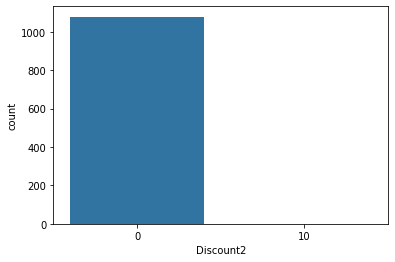

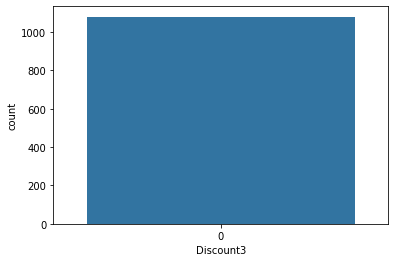

In [ ]:
def Feature_Analysis(df, number = 5, plot = False):

  cat_cols = [cols for cols in df.columns if df[cols].dtype == 'object']

  num_but_cat = [cols for cols in df.columns if df[cols].dtype != 'object'
                and df[cols].nunique() < int(number)]

  num_cols = [cols for cols in df.columns if df[cols].dtype != 'object'
              and cols not in num_but_cat]
  
  print(f"Kategorik Değişken Sayısı : {len(cat_cols)}\nKategorik Değişken : {cat_cols}", end = '\n\n')
  print(f"Numeric Ama Kategorik Değişken Sayısı : {len(num_but_cat)}\nNumeric Ama Kategorik Değişken : {num_but_cat}",end = '\n\n')
  print(f"Numeric Değişken Sayısı : {len(num_cols)}\nNumeric Değişken : {num_cols}",end='\n\n')
  
  if plot:

    for cols in num_but_cat:

      sns.countplot(x=cols, data=df)
      plt.show()

Feature_Analysis(data, plot = True)

# Numeric Değer ve Numeric Değişken 

################ CustomerCode ###########################

237 farklı değeri var


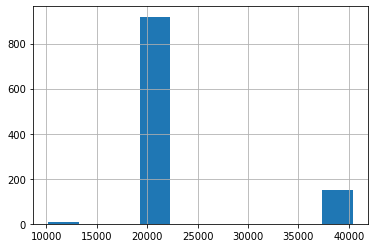



################ Quantity ###########################

56 farklı değeri var


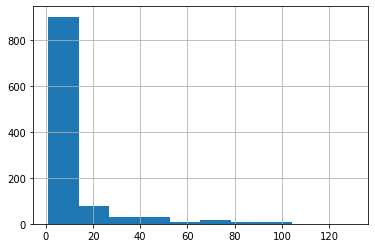



################ Price ###########################

555 farklı değeri var


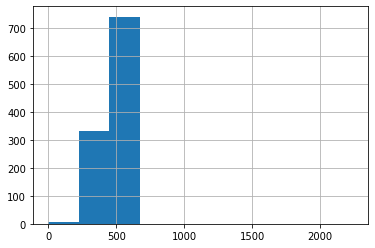



################ Total ###########################

845 farklı değeri var


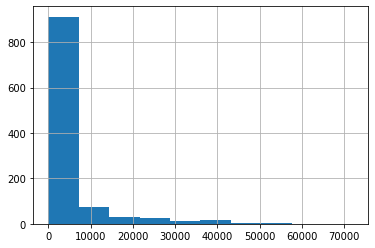



################ Discount1 ###########################

7 farklı değeri var


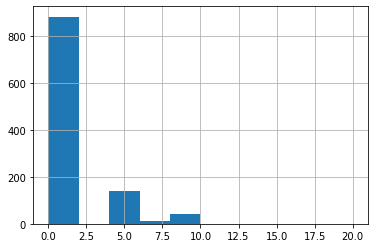



################ NET_TUTAR ###########################

857 farklı değeri var


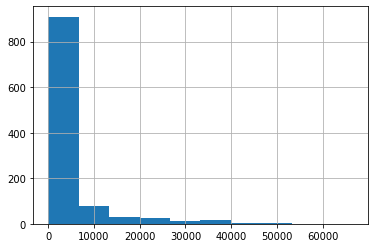



################ ISK_TOPLAM ###########################

7 farklı değeri var


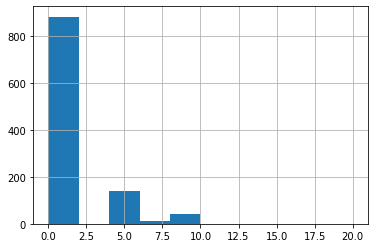

In [ ]:
def Numeric_Analysis(df, plot = False):

  num_cols = [cols for cols in df.columns if df[cols].dtype != 'object'
              and cols not in 'Discount2'
              and cols not in 'Discount3']

  for cols in num_cols:

    if plot:

      print(f"################ {df[cols].name} ###########################", end = '\n\n')
      print(f"{df[cols].value_counts().count()} farklı değeri var")

      df[cols].hist()
      plt.show()
      print(end = '\n\n')

Numeric_Analysis(data,plot = True)

# Numeric Değer 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerCode,1078.0,23160.069573,6897.786922,10186.0,20232.0000,20584.00000,20847.0000,40386.000
Quantity,1080.0,9.665741,17.307188,1.0,2.0000,3.00000,10.0000,130.000
Price,1080.0,480.370491,99.038963,0.0,424.8800,493.05575,535.0705,2238.346
Total,1080.0,4650.639259,8563.323130,0.0,730.6575,1464.13675,4181.9855,71974.760
Discount1,1080.0,1.083333,2.388282,0.0,0.0000,0.00000,0.0000,20.000
Discount2,1080.0,0.009259,0.304290,0.0,0.0000,0.00000,0.0000,10.000
Discount3,1080.0,0.000000,0.000000,0.0,0.0000,0.00000,0.0000,0.000
NET_TUTAR,1080.0,4485.757998,8114.453662,0.0,730.6575,1459.00525,4181.9855,66576.653
ISK_TOPLAM,1080.0,1.083333,2.388282,0.0,0.0000,0.00000,0.0000,20.000


In [ ]:
data.corr()

,CustomerCode,Quantity,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM
CustomerCode,1.000000,0.580275,0.016072,0.575879,0.674540,-0.012278,NaN,0.563866,0.674540
Quantity,0.580275,1.000000,0.004381,0.988640,0.544353,-0.008211,NaN,0.990922,0.544353
Price,0.016072,0.004381,1.000000,0.078098,0.134247,0.022200,NaN,0.075107,0.134247
Total,0.575879,0.988640,0.078098,1.000000,0.577237,-0.006715,NaN,0.999303,0.577237
Discount1,0.674540,0.544353,0.134247,0.577237,1.000000,0.241240,NaN,0.559631,1.000000
Discount2,-0.012278,-0.008211,0.022200,-0.006715,0.241240,1.000000,NaN,-0.009371,0.241240
Discount3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NET_TUTAR,0.563866,0.990922,0.075107,0.999303,0.559631,-0.009371,NaN,1.000000,0.559631
ISK_TOPLAM,0.674540,0.544353,0.134247,0.577237,1.000000,0.241240,NaN,0.559631,1.000000


- **Discount** Değişkenlerine bakalım 

In [ ]:
dis = ['Discount1','Discount2','Discount3']

for cols in dis:

  print(pd.DataFrame({cols:data[cols].value_counts()}))
  print(f"{data[cols].value_counts().count()} adet değeri var", end = "\n\n")

    Discount1
0         881
5         139
8          43
7          14
20          1
10          1
3           1
7 adet değeri var

    Discount2
0        1079
10          1
2 adet değeri var

   Discount3
0       1080
1 adet değeri var



# Kategorik Değişken

######## CustomerName ###########
236 tane değeri var
######## Date ###########
383 tane değeri var
######## DocumentNo ###########
1057 tane değeri var
######## ProductCode ###########
1 tane değeri var
######## ProductName ###########
1 tane değeri var
######## Unit ###########
1 tane değeri var
######## GirisCikis ###########
2 tane değeri var


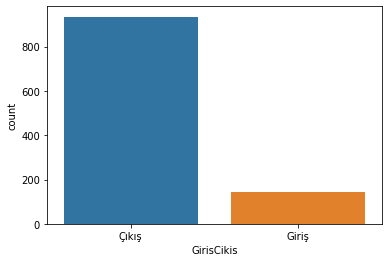

######## EvrakTip ###########
4 tane değeri var


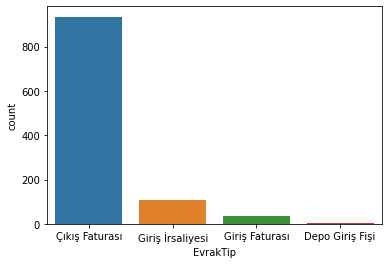

In [ ]:
def Categoric(df, plot = False):

  cat_cols = [cols for cols in df.columns if df[cols].dtype == 'object']

  for cols in cat_cols:

    if plot:

      print(f"######## {df[cols].name} ###########")
      print(f"{len(df[cols].unique())} tane değeri var")

      if df[cols].nunique() > 1 and df[cols].nunique() < 10:

        sns.countplot(x=cols, data = df)
        plt.show()

Categoric(data,plot= True)

# Data Preprocessing 

## Missing Values

- Datamız da Eksik Değere Sahip olan Değişkenlerimize bakacağız 

In [ ]:
data.isnull().any()

CustomerCode     True
CustomerName     True
Date            False
DocumentNo      False
ProductCode     False
ProductName     False
Quantity        False
Unit            False
Price           False
Total           False
Discount1       False
Discount2       False
Discount3       False
NET_TUTAR       False
ISK_TOPLAM      False
GirisCikis      False
EvrakTip        False
dtype: bool

In [ ]:
def Missing_Analysis(df):

  miss_cols = []
   
  columns = df.columns
  
  for cols in columns:
    
    if df[cols].isnull().any(): #Eksik değere sahip değişken için True döner

      miss_cols.append((cols,f" Toplam Eksik Değer : {df[cols].isnull().sum()}"))

  return miss_cols

Missing_Analysis(data)

[('CustomerCode', ' Toplam Eksik Değer : 2'),
 ('CustomerName', ' Toplam Eksik Değer : 2')]

- **CustomerCode** değişkenimizde eksik olan gözlemlerimize tüm data üzerinden bakıyoruz.
- **CustomerCode** değişkenimizde eksik olan gözlemler aynı zaman da **CustomerName** değişkenimizde de eksiktir.

- **CustomerName** değişkeninde eksik olan gözlemlerin indexlerini 1073 ve 1074 olduğunu görüyoruz.

In [ ]:
data['CustomerName'][data['CustomerName'].isnull()].index.to_list()

[1073, 1074]

- Şimdi bu eksik değere sahip değişkenlerimizin eksik değere sahip olan indexi tamamen datamızdan siliyoruz

In [ ]:
data = data.dropna()

data.isnull().any(), data.isnull().sum()

(CustomerCode    False
 CustomerName    False
 Date            False
 DocumentNo      False
 ProductCode     False
 ProductName     False
 Quantity        False
 Unit            False
 Price           False
 Total           False
 Discount1       False
 Discount2       False
 Discount3       False
 NET_TUTAR       False
 ISK_TOPLAM      False
 GirisCikis      False
 EvrakTip        False
 dtype: bool, CustomerCode    0
 CustomerName    0
 Date            0
 DocumentNo      0
 ProductCode     0
 ProductName     0
 Quantity        0
 Unit            0
 Price           0
 Total           0
 Discount1       0
 Discount2       0
 Discount3       0
 NET_TUTAR       0
 ISK_TOPLAM      0
 GirisCikis      0
 EvrakTip        0
 dtype: int64)

## New Feature

In [ ]:
data['Date']

0       2021.08.02
1       2021.02.26
2       2021.05.24
3       2020.11.19
4       2021.02.03
           ...    
1075    2020.07.10
1076    2021.06.10
1077    2020.09.19
1078    2020.09.05
1079    2020.10.26
Name: Date, Length: 1078, dtype: object

- **Date** değişkeninden sadece **Yılı** alıyoruz ve yeni **Yıl** değişkeni elde ediyoruz

In [ ]:
data['Yıl'] = data['Date'].str.extract('([0-9]+)\.', expand = False)

data.head()

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021.08.02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası,2021
1,20959.0,Gökçe Otom - Havva Sağır,2021.02.26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası,2021
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi,2021
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020.11.19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası,2020
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021.02.03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası,2021


- **Date** değişkeninden Sadece **Ayları** alalım 

In [ ]:
data['Date'].str.extract('\.([0-9]+)',expand = False)

0       08
1       02
2       05
3       11
4       02
        ..
1075    07
1076    06
1077    09
1078    09
1079    10
Name: Date, Length: 1078, dtype: object

- **Date** Değişkenimizden **Ay** değişkeni elde edeceğiz.

In [ ]:
data['Ay'] = data['Date'].str.extract('\.([0-9]+)', expand = False)

data.head()

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021.08.02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası,2021,08
1,20959.0,Gökçe Otom - Havva Sağır,2021.02.26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası,2021,02
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi,2021,05
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020.11.19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası,2020,11
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021.02.03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası,2021,02


- Bu **Ay** değişkeninde ki rakamları **int** değerleri **object** değerlere çevireceğiz.

In [ ]:
ay_map = {'01':'Ocak','02':'Şubat','03':'Mart', '04':'Nisan', '05':'Mayıs','06':'Haziran',
          "07" : 'Temmuz', "08" :'Ağustos', "09":'Eylül', "10":'Ekim', "11": 'Kasım', "12" : 'Aralık'}

data['Ay'] = data['Ay'].map(ay_map).astype('object')

data.head()

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021.08.02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası,2021,Ağustos
1,20959.0,Gökçe Otom - Havva Sağır,2021.02.26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası,2021,Şubat
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.05.24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi,2021,Mayıs
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020.11.19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası,2020,Kasım
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021.02.03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası,2021,Şubat


- Fiyatı **0** olan kirli data var mı ona bakıyoruz.
- 1 gözlem de **Price** değişkeninin **0 değeri** var olduğunu görüyoruz.

In [ ]:
data[data['Price'] == 0]

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay
567,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021.10.05,MKI11231,VDN112510,Komp Kapağı,15,ADET,0.0,0.0,0,0,0,0.0,0,Giriş,Giriş İrsaliyesi,2021,Ekim


- Fiyatlarda indirim uygulanmış, kirli data vs. olabilir. Bundan kurtulmak için, fiyat ve miktarı 0’dan büyük olan siparişleri alıyoruz

In [ ]:
data = data[(data['Price'] > 0) & (data['Quantity'] > 0)]

- **Fiyatı 0 olan** gözlemden de kurtuluyoruz.

In [ ]:
data[data['Price'] == 0]

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay


# Aykırı Değer Analizi

- Bir değişken için **Alt Eşik ve Üst Eşik değerleri** döndüren fonskiyon yazalım.

In [ ]:
def Low_up(df,feature):

  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)

  IQR = np.multiply(1.5, np.subtract(Q3, Q1))

  low = IQR - Q1
  up = Q3 + IQR

  return low, up

Low_up(data, feature = 'NET_TUTAR')

(4382.665, 9254.335)

- Bir değişken için **Aykırı Değer Olup Olmadığını** kontrol eden ve **Boolean Değer** döndüren bir fonksiyon yazalım.

In [ ]:
def Outliers_have(df, feature):

  result = []

  low, up = Low_up(df, cols) #alt eşik ve üst eşik değer bulan fonskiyonu kullanıyoruz.
  
  if df[feature][(df[feature] < low) | (df[feature] > up)].any(axis=None): #Aykırı değeri verir.

    return True
  else:
    return False

Outliers_have(df = data,feature = 'NET_TUTAR')

True

- Numeric Değişkenlerin hepsi için kendisi Aykırı Değer kontrolü yapan ve bize o değişkenleri ve alt,üst eşik değerlerini veren bir fonskiyon yazalım.

####################### CustomerCode ###########################

{'Alt Eşik Değer': -19309.5, 'Üst Eşik Değer': 21769.5, 'Toplam Aykırı Değer Sayısı': 150}



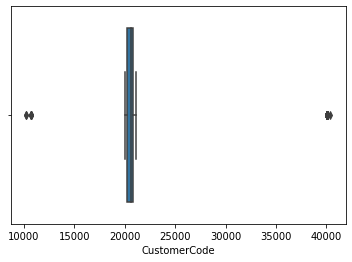

####################### Quantity ###########################

{'Alt Eşik Değer': 10.0, 'Üst Eşik Değer': 22.0, 'Toplam Aykırı Değer Sayısı': 904}



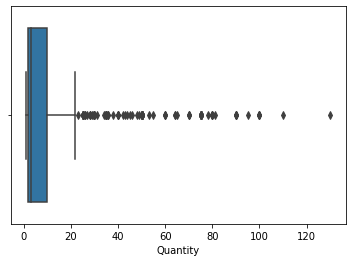

####################### Price ###########################

{'Alt Eşik Değer': -259.27699999999993, 'Üst Eşik Değer': 700.8850000000001, 'Toplam Aykırı Değer Sayısı': 3}



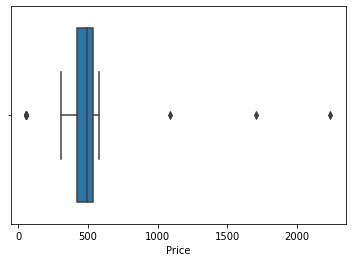

####################### Total ###########################

{'Alt Eşik Değer': 4382.665, 'Üst Eşik Değer': 9254.335, 'Toplam Aykırı Değer Sayısı': 958}



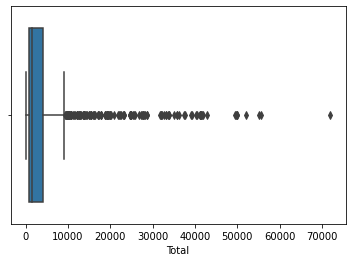

####################### NET_TUTAR ###########################

{'Alt Eşik Değer': 4382.665, 'Üst Eşik Değer': 9254.335, 'Toplam Aykırı Değer Sayısı': 955}



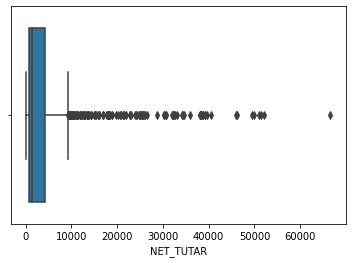

{'Aykırı Değer Olan Değişkenler': ['CustomerCode',
  'Quantity',
  'Price',
  'Total',
  'NET_TUTAR'],
 'Aykırı Değer Olmayan Değişkenler': ['Discount1',
  'Discount2',
  'Discount3',
  'ISK_TOPLAM']}

In [ ]:
def Outliers_Analysis(df, plot = False):

  aykırı = []

  aykırı_yok = []

  num_cols = [cols for cols in df.columns if df[cols].dtypes != 'object'
             and cols not in 'Date'] #Numeric değişkenleri aldık.Date Değişkenini dahil etmedik.

  for cols in num_cols:

    low, up = Low_up(df,feature=cols) #alt ve üst eşik değeri bulan fonskiyon

    if low == 0 and up == 0: # alt,üst eşik değeri 0 olan bir değişkenin aykırı değeri yoktur.

      aykırı_yok.append(cols)

    else:
      number = df[cols][(df[cols] < low) | (df[cols] > up)].count() #Aykırı değeri var ise count ile toplam aykırı değer sayısını alırız.
    
      if number > 0:
        
        aykırı.append(cols)

        cache = {'Alt Eşik Değer':low,
             'Üst Eşik Değer':up,
             'Toplam Aykırı Değer Sayısı':number
              }

        print(f"####################### {df[cols].name} ###########################",end = "\n\n")
        print(cache, end = "\n\n")

        if plot: #plot Parametremize True dersek Aykırı değer olan değişkenlerimizin Boxplot'unu çizdirir.

          sns.boxplot(x = cols, data = df)
          plt.show()

      else:
        aykırı_yok.append(cols)

      cache_feature = {'Aykırı Değer Olan Değişkenler': aykırı,
                   'Aykırı Değer Olmayan Değişkenler':aykırı_yok
                   }

  return cache_feature

Outliers_Analysis(df = data, plot = True)

In [ ]:
[cols for cols in data.columns if data[cols].dtypes != 'object'
and cols not in 'Date']

['CustomerCode',
 'Quantity',
 'Price',
 'Total',
 'Discount1',
 'Discount2',
 'Discount3',
 'NET_TUTAR',
 'ISK_TOPLAM']

#Müşteri - Fiyat Analizi

- Toplam ücret değişkenimizi boxplot ile görselleiştiriyoruz.

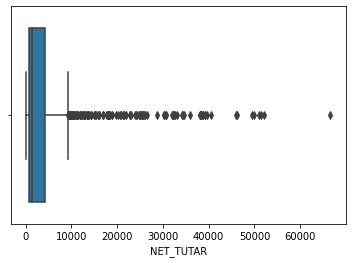

In [ ]:
import seaborn as sns

sns.boxplot(data['NET_TUTAR'], data=data);

- **NET_TUTAR** değişkenimizin ortalamasının: **4455**
- Standart Sapmasının : **8069** olduğunu görüyoruz.
- O yüzden boxplot grafiğinde 0'a daha yakın olduğunu söyleyebiliyoruz.

In [ ]:
data['NET_TUTAR'].describe()

count     1077.000000
mean      4455.632923
std       8069.267183
min         55.000000
25%        731.210000
50%       1455.580500
75%       4140.460000
max      66576.653000
Name: NET_TUTAR, dtype: float64

- **CustomerCode** değişkeni ile **Toplam Ücret** değişkenimizi görselleştirdik.
- Görselden yaptığımız analize göre ; 
    - **1000 kodlu CustomerCode'ları sayısıının diğerlerine göre daha ve bu kodların kazandırmış olduğu ücretler çok düşük.**
    - **2000 kodlu CustomerCode'ları sayısının diğerlerine göre oranla daha fazla ve ortalama 15000 ile 0 arasında bir ücret kazancı var. O değerlerde bir yığılma söz konusudur.**
    - **4000 kodlu CstomerCode'ları ise sayısının az ama Fiyat olarak diğerlerinden fazla olduğu söz konusudur.**
-

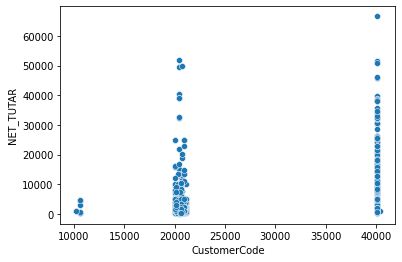

In [ ]:
sns.scatterplot(x=data['CustomerCode'], y = data['NET_TUTAR'], data=data);

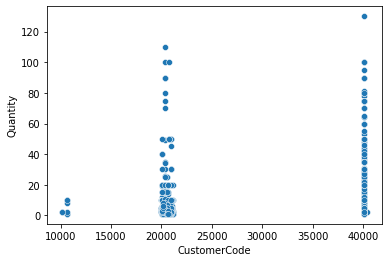

In [ ]:
sns.scatterplot(x='CustomerCode', y='Quantity', data=data);

- **En Çok Ücret Ödeyen ve En çok Sipariş veren ilk 30 Müşteri Kodları** aşağıdaki gibidir. 

In [ ]:
data.groupby(by=['CustomerCode', 'Quantity'], as_index = False)['NET_TUTAR'].max().sort_values('NET_TUTAR', ascending = False).head(30)

,CustomerCode,Quantity,NET_TUTAR
582,40094.0,130,66576.65300
232,20410.0,100,52000.00000
581,40094.0,100,51436.15125
400,20765.0,100,50000.00000
233,20410.0,110,49500.00000
579,40094.0,90,46203.71300
231,20410.0,90,40500.00000
575,40094.0,75,39618.77675
230,20410.0,80,39200.00000
577,40094.0,80,38590.11000


- Bir Müşterinin **Toplam Harcamasına** bakalım.
- **En çok Ücret ödeyen** ilk 30 müşterileri göreceğiz.
- Müşteri Kodlarının yanına, Müşteri İsimlerini de ekleyelim.
- Toplam Harcamaları da büyükten küçüğe doğru sıralayalım

In [ ]:
data.groupby(by = ['CustomerCode', 'CustomerName'], as_index = False)['NET_TUTAR'].sum().sort_values('NET_TUTAR', ascending = False).head(30)

,CustomerCode,CustomerName,NET_TUTAR
234,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2.369596e+06
93,20410.0,Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic...,3.337336e+05
147,20670.0,3Y Otom.San.Tic.Ltd.Şti.,1.670009e+05
210,20966.0,Otokaraman Otom.Yedek Parça Tic.Ltd.Şti.,8.497400e+04
165,20765.0,Nail Otom.San.Tic.Ltd.,7.795543e+04
7,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,6.787588e+04
90,20396.0,Ertaş Otom.Tic.San.A.Ş.,6.617574e+04
18,20081.0,Rova Grup Mot.Araç.Otom.İnş.San.Tic.Ltd.Şti.,6.080914e+04
196,20914.0,Mustafa İnanç Otom.Ser.Hiz.Akar.San.Tic.Ltd.Şti.,5.303492e+04
13,20048.0,Emrah Otom.San.Tic.Ltd.Şti.,5.097854e+04


# Zaman - Satış Analizi

- Zaman işlemlerinde **Date** değişkenini kullanabilmek için  **tipini datetime** yapıyoruz.

In [ ]:
import datetime as dt 

data['Date'] = pd.to_datetime(data['Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerCode  1077 non-null   float64       
 1   CustomerName  1077 non-null   object        
 2   Date          1077 non-null   datetime64[ns]
 3   DocumentNo    1077 non-null   object        
 4   ProductCode   1077 non-null   object        
 5   ProductName   1077 non-null   object        
 6   Quantity      1077 non-null   int64         
 7   Unit          1077 non-null   object        
 8   Price         1077 non-null   float64       
 9   Total         1077 non-null   float64       
 10  Discount1     1077 non-null   int64         
 11  Discount2     1077 non-null   int64         
 12  Discount3     1077 non-null   int64         
 13  NET_TUTAR     1077 non-null   float64       
 14  ISK_TOPLAM    1077 non-null   int64         
 15  GirisCikis    1077 non-null   object  

- Datamızın **Date** değişkenini kullanarak yeni **Yıl-Ay** değişkeni elde ediyoruz.
- Bu değişkeni grafikleştirirken kullanacağız

In [ ]:
data['Yıl_Ay'] = data['Date'].dt.to_period('M').astype(str)

data.head()

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay,Yıl_Ay
0,40096.0,Trakman Otom.San.Tic.Ltd.Şti.,2021-08-02,GOF93201,VDN112510,Komp Kapağı,3,ADET,551.452000,1654.356,0,0,0,1654.35600,0,Çıkış,Çıkış Faturası,2021,Ağustos,2021-08
1,20959.0,Gökçe Otom - Havva Sağır,2021-02-26,GOF24763,VDN112510,Komp Kapağı,2,ADET,483.829500,967.659,0,0,0,967.65900,0,Çıkış,Çıkış Faturası,2021,Şubat,2021-02
2,40094.0,YPS Global Otom.İç Dış Tic.A.Ş.,2021-05-24,MKI5642,VDN112510,Komp Kapağı,22,ADET,562.407727,12372.970,8,0,0,11444.99725,8,Giriş,Giriş İrsaliyesi,2021,Mayıs,2021-05
3,20604.0,Mahmut Keskin Otom.San.Tic.Lts.Şti.,2020-11-19,GNF48881,VDN112510,Komp Kapağı,5,ADET,506.011000,2530.055,0,0,0,2530.05500,0,Çıkış,Çıkış Faturası,2020,Kasım,2020-11
4,20029.0,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021-02-03,GOF14184,VDN112510,Komp Kapağı,10,ADET,451.000000,4510.000,0,0,0,4510.00000,0,Çıkış,Çıkış Faturası,2021,Şubat,2021-02


- Aylık Satışların toplamını grupladık

In [ ]:
aylık = data.groupby('Yıl_Ay', as_index = False)['NET_TUTAR'].sum()

aylık

,Yıl_Ay,NET_TUTAR
0,2020-01,60414.710000
1,2020-02,62018.263000
2,2020-03,161951.860000
3,2020-04,113034.219500
4,2020-05,134995.131000
5,2020-06,222678.398000
6,2020-07,272504.999000
7,2020-08,188522.570403
8,2020-09,310618.845928
9,2020-10,59711.128800


- Aylık toplam Satışları grafik üzerinde görelim

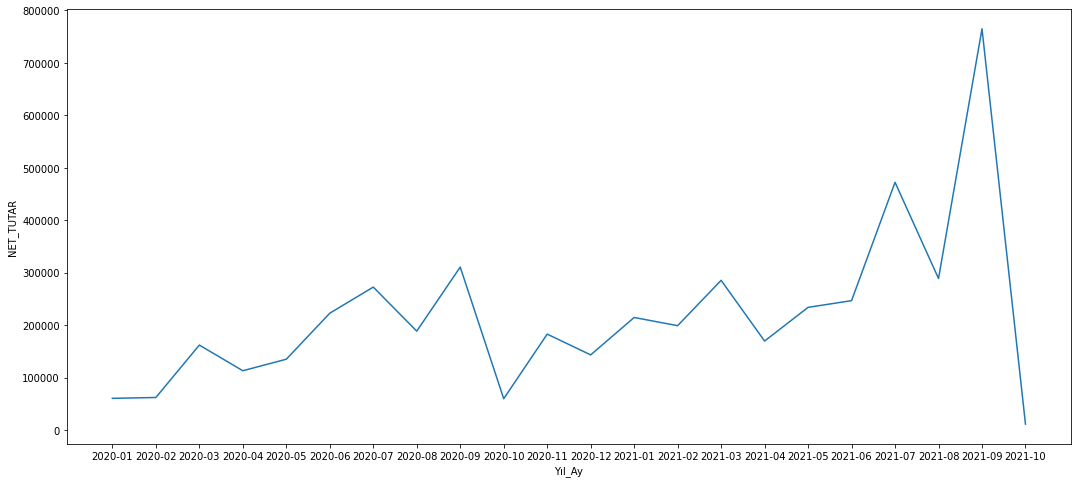

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Yıl_Ay', y='NET_TUTAR', data=aylık);
plt.show()

- Grafikten gördüğümüz gibi **En çok satışların**, **2021 Yılında Ağustos ve Eylül Ayları arasında** olduğunu görüyoruz.

- Aşağıda ki tablodan da bunu görebiliyoruz.

In [ ]:
data.groupby('Yıl_Ay', as_index=False)['NET_TUTAR'].sum().sort_values('NET_TUTAR', ascending = False)

,Yıl_Ay,NET_TUTAR
20,2021-09,764911.776300
18,2021-07,472255.352350
8,2020-09,310618.845928
19,2021-08,288904.334925
14,2021-03,285382.159375
6,2020-07,272504.999000
17,2021-06,246631.879810
16,2021-05,233844.344375
5,2020-06,222678.398000
12,2021-01,214528.526780


- En çok satışın olduğu dönemde hangi firmalar, ne kadar ürün almış onlara bakalım
- İlk olarak **2021-09** olan aralıkları alıyoruz

In [ ]:
more_price = data[(data['Yıl'] == '2021') & (data['Ay'] == 'Eylül')] 

more_price

,CustomerCode,CustomerName,Date,DocumentNo,ProductCode,ProductName,Quantity,Unit,Price,Total,Discount1,Discount2,Discount3,NET_TUTAR,ISK_TOPLAM,GirisCikis,EvrakTip,Yıl,Ay,Yıl_Ay
30,20601.0,Metsen Otom.San.Tic.Ltd.Şti.,2021-09-15,GOA97119,VDN112510,Komp Kapağı,5,ADET,500.0000,2500.0000,0,0,0,2500.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
39,20342.0,Aşkınlar Otom.Turz.San.Tic.Ltd.Şti.,2021-09-10,GOF115931,VDN112510,Komp Kapağı,1,ADET,521.7600,521.7600,0,0,0,521.7600,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
41,20493.0,Tutanlar Otom.Tic.Ltd.Şti.,2021-09-16,GOF118908,VDN112510,Komp Kapağı,6,ADET,500.0000,3000.0000,0,0,0,3000.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
42,20225.0,Yavuz Mot.Araç.ve Oto Yed.Par.Turz.San.Tic.Ltd...,2021-09-15,GOA97015,VDN112510,Komp Kapağı,10,ADET,500.0000,5000.0000,0,0,0,5000.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
43,20584.0,Egem Mot.Araç.Turz.İnş.ve San.Tic.Ltd.Şti.,2021-09-08,GOF114009,VDN112510,Komp Kapağı,6,ADET,541.0680,3246.4080,0,0,0,3246.4080,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,20969.0,Atanur Mercedes Otom.San.Tic.Ltd.Şti.,2021-09-15,GOF118505,VDN112510,Komp Kapağı,5,ADET,500.0000,2500.0000,0,0,0,2500.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
990,20095.0,Volkar Otom - Kamil Erek,2021-09-15,GOF118358,VDN112510,Komp Kapağı,15,ADET,500.0000,7500.0000,0,0,0,7500.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
991,20820.0,Sfc Otom - Fatih ve Cemile Coşkun,2021-09-15,GOA97313,VDN112510,Komp Kapağı,5,ADET,500.0000,2500.0000,0,0,0,2500.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09
1001,20410.0,Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic...,2021-09-17,GOF119747,VDN112510,Komp Kapağı,34,ADET,500.0000,17000.0000,0,0,0,17000.0000,0,Çıkış,Çıkış Faturası,2021,Eylül,2021-09


- Sadece **2021-09** tarihleri arasındaki verileri aldığımız datamızdan **CustomerName, Quantity ve Toplam Ücret** değerlerini gruplandırdık.

In [ ]:
more_price.groupby(by = ['CustomerName', 'Quantity'], as_index = False)['NET_TUTAR'].sum().sort_values('NET_TUTAR', ascending = False)

,CustomerName,Quantity,NET_TUTAR
112,YPS Global Otom.İç Dış Tic.A.Ş.,100,51436.15125
78,Nail Otom.San.Tic.Ltd.,100,50000.00000
85,Otokaraman Otom.Yedek Parça Tic.Ltd.Şti.,50,50000.00000
48,Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic...,80,39200.00000
111,YPS Global Otom.İç Dış Tic.A.Ş.,75,38025.76025
...,...,...,...
119,Yılmaz Otom.Tic - Muammer Yılmaz,1,542.76200
94,Teknik Benz Mercedes Ağır Vasıta Servisi-Hasan...,1,542.67950
89,Saylam End.Otom.Yedek Parça İnş.San.Tic.Ltd.Şti.,1,539.47850
8,Anadolu Otom - Efdal Yazıcılar,1,539.47300


- **En çok satışın yapıldığı zaman diliminde**, **En fazla Ürün sipariş veren ilk 30 firma** aşağıdaki gibidir.

In [ ]:
more_price.groupby(by = ['CustomerName', 'Quantity'], as_index = False)['NET_TUTAR'].sum().sort_values('NET_TUTAR', ascending = False).head(30)

,CustomerName,Quantity,NET_TUTAR
112,YPS Global Otom.İç Dış Tic.A.Ş.,100,51436.15125
78,Nail Otom.San.Tic.Ltd.,100,50000.00000
85,Otokaraman Otom.Yedek Parça Tic.Ltd.Şti.,50,50000.00000
48,Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic...,80,39200.00000
111,YPS Global Otom.İç Dış Tic.A.Ş.,75,38025.76025
110,YPS Global Otom.İç Dış Tic.A.Ş.,50,25098.92225
5,Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,50,25000.00000
0,3Y Otom.San.Tic.Ltd.Şti.,20,20283.32250
109,YPS Global Otom.İç Dış Tic.A.Ş.,35,17863.58150
47,Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic...,34,17000.00000


- **En çok satışın yapıldığı zaman diliminde**, **En Az Ürün siparişi veren** ilk 30 firmalar da aşağıdaki gibidir.

In [ ]:
more_price.groupby(by=['CustomerName', 'Quantity'], as_index=False)['NET_TUTAR'].sum().sort_values('NET_TUTAR').head(30)

,CustomerName,Quantity,NET_TUTAR
22,Aşkınlar Otom.Turz.San.Tic.Ltd.Şti.,1,521.76000
8,Anadolu Otom - Efdal Yazıcılar,1,539.47300
89,Saylam End.Otom.Yedek Parça İnş.San.Tic.Ltd.Şti.,1,539.47850
94,Teknik Benz Mercedes Ağır Vasıta Servisi-Hasan...,1,542.67950
105,Voler Mot.Araç.Otom.Yed.San.Tic.Ltd.Şti.,1,542.76200
119,Yılmaz Otom.Tic - Muammer Yılmaz,1,542.76200
62,Kılınç Ticaret - Ramiz Kılınç,1,547.65150
106,Volkar Otom - Kamil Erek,1,548.11900
124,Öz Erkan Otom.İth.İhr.San.Tic.Ltd.Şti.,1,548.21250
55,Karaduman Grup Otom - Özer Karaduman,1,569.52500


# RFM Analizi 


- Müşteri Adına göre son yapılan alışveriş tarihlerini buluyoruz.

## Recency : Yenilik

- Müşterinin son satın almasından bugüne kadar geçen süre.Yani müşterinin en son ne zaman ürün satın aldığıdır. Onun üzerinden geçen süredir.



In [ ]:
data.groupby('CustomerName').agg({'Date':'max'}).head()

,Date
CustomerName,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,2021-07-16
3Y Otom.San.Tic.Ltd.Şti.,2021-10-06
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,2021-09-20
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,2021-09-15
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,2021-09-15


In [ ]:
data['Date'].min(), data['Date'].max()

(Timestamp('2020-01-07 00:00:00'), Timestamp('2021-10-06 00:00:00'))

- Bugünün Tarihini oluşturduk

In [ ]:
today_date = dt.datetime(2021,10,14)

today_date

datetime.datetime(2021, 10, 14, 0, 0)

- Recency değişkeni elde ettik.
- Recency değişkeni en son ki sipraiş üzerinden kaç gün geçtiğini bize verir.

In [ ]:
recency = (today_date - data.groupby('CustomerName').agg({'Date':'max'}))

recency.rename(columns = {'Date':'Recency'}, inplace=True)

recency

,Recency
CustomerName,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90 days
3Y Otom.San.Tic.Ltd.Şti.,8 days
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24 days
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29 days
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29 days
...,...
İrem Otom - Beytullah Beşikçi,594 days
İşçioğlu Otom - Yusuf Seyfeddin İşçi,132 days
Şah Otom.Yedek Parça - Tuba Şahin,125 days


- Günlerin yanında ki **days** siliyoruz

In [ ]:
recency = recency['Recency'].apply(lambda x:x.days) 

recency 

CustomerName
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.                 90
3Y Otom.San.Tic.Ltd.Şti.                                    8
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.                24
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.     29
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.                  29
                                                         ... 
İrem Otom - Beytullah Beşikçi                             594
İşçioğlu Otom - Yusuf Seyfeddin İşçi                      132
Şah Otom.Yedek Parça - Tuba Şahin                         125
Şahmurat Ticaret - Faruk Kayıp                             92
Şener Otom.Nak.San.Tic.Ltd.Şti.                            17
Name: Recency, Length: 235, dtype: int64

## Frequency : Sıklık

- Müşterinin toplam satın alma sayısıdır.


- Müşterilerin toplam Quantity değerlerini görelim.
- Her müşteri kaç alışveriş yapmış toplamda bunu buluyoruz.

In [ ]:
data.groupby('CustomerName').agg({'Quantity':'count'}).sort_values('Quantity', ascending =False)

,Quantity
CustomerName,
YPS Global Otom.İç Dış Tic.A.Ş.,133
Emrah Otom.San.Tic.Ltd.Şti.,35
3Y Otom.San.Tic.Ltd.Şti.,29
Aktaş Otom.San.Tic.Ltd.Şti.,22
Anadolu Otom - Efdal Yazıcılar,20
...,...
Duman Mot.Araç - Mustafa Duman,1
Duse Otom.Dış Tic.San.Tic.Ltd.Şti.,1
Oto Dizel Servis - Uğurcan Sağlam,1


In [ ]:
freq = data.groupby('CustomerName').agg({'Quantity':'count'})

freq.rename(columns = {'Quantity':'Frequency'}, inplace = True) #Quantity ismi ile Frequency ismini değiştirdik.

freq

,Frequency
CustomerName,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,1
3Y Otom.San.Tic.Ltd.Şti.,29
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,6
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,1
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,11
...,...
İrem Otom - Beytullah Beşikçi,1
İşçioğlu Otom - Yusuf Seyfeddin İşçi,1
Şah Otom.Yedek Parça - Tuba Şahin,1


## Monetary : Parasallık

- Müşterinin yaptığı **Toplam Harcamadır**.
- Müşteriler toplam ne kadar ücret ödemiş onları buluyoruz.

In [ ]:
mone = data.groupby('CustomerName').agg({'NET_TUTAR':'sum'})

mone.rename(columns = {'NET_TUTAR':'Monetary'}, inplace = True) #Net_Tutar ismi ile Monetary ismini değiştirdik.

mone  

,Monetary
CustomerName,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,559.586500
3Y Otom.San.Tic.Ltd.Şti.,167000.859500
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,12651.723500
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,5000.000000
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,67875.880875
...,...
İrem Otom - Beytullah Beşikçi,371.060000
İşçioğlu Otom - Yusuf Seyfeddin İşçi,579.040000
Şah Otom.Yedek Parça - Tuba Şahin,571.972500


## RFM

- **Recency, Frequency, Monetary datalarını** tek bir DataFrame de birleştiriyoruz.


In [ ]:
rfm = pd.concat([recency,freq,mone], axis = 1)

rfm

,Recency,Frequency,Monetary
CustomerName,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875
...,...,...,...
İrem Otom - Beytullah Beşikçi,594,1,371.060000
İşçioğlu Otom - Yusuf Seyfeddin İşçi,132,1,579.040000
Şah Otom.Yedek Parça - Tuba Şahin,125,1,571.972500


- **Recency , Monetary ,Frequency** değerlerini bulduktan sonra bu değerlere 1 ile 5 arasında değerler vererek müşterileri değerlendirerek segmentlere ayıracağız.
- Bu değerlerden **5 = Çok İyi, 1 = Çok Kötü** anlamına gelmektedir.

## Receny Score 

- **Recency Score** elde ediyoruz.

- Receny Skor bulurken dikkat etmemiz gereken husus **Skorlamanın Tersten** yapılmasıdır. Bunun nedeni ; Recency değeri en son ne zaman alışveriş yaptığımızın değeriydi. En son alışveriş yaptığımız zamanın 1 gün önce olduğunu farz edelim. Diğer müşterinin ise en son 120 gün önce alışveriş yaptı diyelim.
   - Biz 1 gün önce alışveriş yaptığımız için **Recency Skor**'umuz **5** olacaktır.
   - Diğer Müşteri ise 120 gün önce alışveriş yaptığı için **Recency Skor**'u **1** olacaktır. 
   - Kısacası ; **Recency Skoru için bugünün tarihine olan yakın zamanda yapılan alışverişler daha iyi bir skora sahip olacaktır.**

In [ ]:
rfm['RecencyScore'] = pd.qcut(rfm['Recency'].rank(method = 'first'),5,labels = [5,4,3,2,1])

rfm

,Recency,Frequency,Monetary,RecencyScore
CustomerName,,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500,3
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500,5
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000,5
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5
...,...,...,...,...
İrem Otom - Beytullah Beşikçi,594,1,371.060000,1
İşçioğlu Otom - Yusuf Seyfeddin İşçi,132,1,579.040000,2
Şah Otom.Yedek Parça - Tuba Şahin,125,1,571.972500,2


## Frequency Score

- **Frequency** için skor elde ediyoruz.

In [ ]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1,2,3,4,5])

rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
CustomerName,,,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500,3,1
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5,5
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500,5,4
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000,5,1
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5,5
...,...,...,...,...,...
İrem Otom - Beytullah Beşikçi,594,1,371.060000,1,2
İşçioğlu Otom - Yusuf Seyfeddin İşçi,132,1,579.040000,2,2
Şah Otom.Yedek Parça - Tuba Şahin,125,1,571.972500,2,2


## Monetary Score

- **Monetary** için skor elde ediyoruz.

In [ ]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])

rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerName,,,,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500,3,1,1
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5,5,5
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500,5,4,5
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000,5,1,3
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5,5,5
...,...,...,...,...,...,...
İrem Otom - Beytullah Beşikçi,594,1,371.060000,1,2,1
İşçioğlu Otom - Yusuf Seyfeddin İşçi,132,1,579.040000,2,2,1
Şah Otom.Yedek Parça - Tuba Şahin,125,1,571.972500,2,2,1


- **Recency , Frequency ve Monetary** için bulduğumuz skorları yan yana topluyoruz. 

In [ ]:
(rfm['RecencyScore'].astype('str') + rfm['FrequencyScore'].astype('str') + rfm['MonetaryScore'].astype('str')).head()

CustomerName
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.                311
3Y Otom.San.Tic.Ltd.Şti.                                  555
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.               545
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.    513
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.                 555
dtype: object

- Toplayarak elde ettiğimiz bu skorları **rfm datamıza** değişken olarak ekliyoruz

In [ ]:
rfm['RFM Skor'] = rfm['RecencyScore'].astype('str') + rfm['FrequencyScore'].astype('str') + rfm['MonetaryScore'].astype('str')

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Skor
CustomerName,,,,,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500,3,1,1,311
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5,5,5,555
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500,5,4,5,545
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000,5,1,3,513
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5,5,5,555


- En İyi müşterilere bakalım

In [ ]:
rfm[rfm['RFM Skor'] == '555'].head() 

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Skor
CustomerName,,,,,,,
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5,5,5,555
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5,5,5,555
Alemdar End.Mak.Otom.San.Tic.Ltd.Şti.,29,7,16138.228000,5,5,5,555
Anadolu Otom - Efdal Yazıcılar,29,20,32914.912750,5,5,5,555
Ankara Grup Tic.Araç.Yedek Parça San.Tic.Ltd.Şti.,29,10,35546.090125,5,5,5,555


- En kötü müşteriye bakalım

In [ ]:
rfm[rfm['RFM Skor'] == '111'].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Skor
CustomerName,,,,,,,
Aksoy Otom.Yedek Parça Ser.Hiz.San.Tic.Ltd.Şti.,491,1,842.5000,1,1,1,111
Atılım Oto Tamir Bakım Yedek Parça Tic.Ltd.Şti.,386,1,492.7505,1,1,1,111
Barışım Otom.Akar.Nak.Gıda San.Tic.Ltd.Şti.,427,1,471.9715,1,1,1,111
Cng Mot.Araç.San.ve Dış Tic.Ltd.Şti.,385,1,493.6360,1,1,1,111
Dilbaz Otom - Ercan Dilbaz,461,1,428.0540,1,1,1,111


## RFM Tablosu

- RFM analizinde yaygın olarak kullanılan tablo aşağıda ki gibidir.
- Bu tabloda genellikle **2 parametre** kullanılır. Bunlar ;

   - **Recency : Yenilik**
   - **Frequency : Sıklık**
- Tablo'da Müşteriler Segmentlere Ayrılmış durumdadır. Parametre değerlerine bakılarak müşterilerin segmentleri belirlenmektedrir.
- Bizlerde Analizimizi Bu segmentlere göre yaparız.

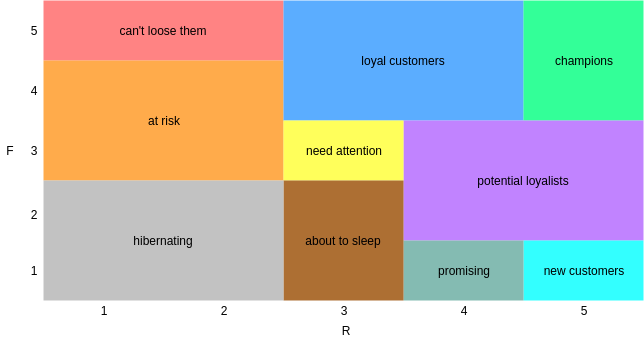

- Yukarıda ki tabloda ki Segmnetleri **RFM** datamıza ekleyeceğiz.
- Önce **Segment** değişkeni oluşturuyoruz. Bunu oluştururken **Recency ve Frequency** değerlerini topluyoruz. Bunun sebebi ise tabloda sadece **Recency ve Frequency** parametreleri vardır.

- Daha sonra topladığımız değerlerin yerine dictionary olarak atadığımız **Müşteri Segmentlerini** atıyoruz. Örneğin ;

   - **( Recency = 4 )** + **( Frequency = 5 )** = **45** olur.

   - **45** **--->** **Champions Segmenti** olacaktır.

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions' 
}


rfm['Segment'] = rfm['RecencyScore'].astype('str') + rfm['FrequencyScore'].astype('str')

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex = True)

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Skor,Segment
CustomerName,,,,,,,,
3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.,90,1,559.586500,3,1,1,311,About to Sleep
3Y Otom.San.Tic.Ltd.Şti.,8,29,167000.859500,5,5,5,555,Champions
Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.,24,6,12651.723500,5,4,5,545,Champions
Acarlar Mersin Yed.Par.Mot.Taş.İth.İhr.ve Tic.Ltd.Şti.,29,1,5000.000000,5,1,3,513,New Customers
Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.,29,11,67875.880875,5,5,5,555,Champions


- **RFM tablosunda ki Segmentlere göre Recency, Frequency, Monetary değerlerimizi gruplandırarak bakalım**.

- **Champions Segmenti** : Bu Segmentte bulunan müşteriler bizim en iyi müşterilerimiz olur. Yakın zamanda satın alım yapmış ve sık sık alışveriş yapmaya devam ederler.

   - Şampiyonlar Segmentinde ki müşterilerin arasında en yüksek miktarda harcama yapan müşterilerimiz ise **Customer Lifetime value(CLV)** değeri en yüksek olan müşterilerimizdir.Bu müşterileri bizim marka itibarını yükselteceğinden onlara kendilerini seçilmiş ve avantajlı hissettirmelisiniz.
   - Onlarla daha çok etkileşimde bulunabilir, deneyimleri hakkında değerlenbdirmeler yapmalarını isteyebilir ve cazip kampanyalar, özel indirimler gibi onları ödüllendirebilirsiniz.


- Bizim **Şampiyonlar Segmentinden bulunan Müşterilerimize** bakalım

In [ ]:
rfm[rfm['Segment'] == 'Champions'].index.tolist()

['3Y Otom.San.Tic.Ltd.Şti.',
 'Acarlar Gebze Yed.Par.Otom.San.Tic.Ltd.Şti.',
 'Acarlar Yedek Parça Otom.San.Tic.Ltd.Şti.',
 'Alemdar End.Mak.Otom.San.Tic.Ltd.Şti.',
 'Anadolu Otom - Efdal Yazıcılar',
 'Ankara Grup Tic.Araç.Yedek Parça San.Tic.Ltd.Şti.',
 'Arslanoğlu Mak.Yed.Parça Nak.San.Tic.Ltd.Şti.',
 'Atakul Dizel Otom.San.Tic.A.Ş.',
 'Aydemir Tic - Tevfik Aydemir',
 'Aydınlar Oto Tamirhanesi - Aydoğan Yezer',
 'Aşkınlar Otom.Turz.San.Tic.Ltd.Şti.',
 'Batı Otom.Servis San.İth.İhr.ve Tic.Ltd.Şti.',
 'Bayram Otom.İç Dış Tic.Ltd.Şti.',
 'Demirci Mot.Araç.San.Tic.Ltd.Şti.',
 'Dündar Makina San.Tic.Ltd.Şti.',
 'Egem Mot.Araç.Turz.İnş.ve San.Tic.Ltd.Şti.',
 'Emr Yedek Parça Otom.San.Tic.Ltd.Şti.',
 'Emrah Otom.San.Tic.Ltd.Şti.',
 'Ertaş Otom.Tic.San.A.Ş.',
 'Fırat Makina Otom.Teks.Turz.İnş.San.ve Dış Tic.Ltd Şti.',
 'Gürmer Otom.Servis Hiz.Nak.San.Tic.Ltd.Şti.',
 'Karaduman Grup Otom - Özer Karaduman',
 'Otokaraman Otom.Yedek Parça Tic.Ltd.Şti.',
 'Pasific Diesel Yedek Parça İç Dış Tic.Lt

- **Promising : Gelecek Vaat Eden** ; Bu Segmentte bulunan müşteriler yakın zamandabizden alışveriş yapanlar müşterilerdir.
- Onları **Şampiyonlar Segmentine** yükseltmek için ;

  - **Sadakat Programları**,
  - **Onboarding Desteği**,
  - **Üyelik Ayrıcalıkları** sunabiliriz.

- Müşteri nezdinde marka algımızı yükseltmek için müşterilerin markamızla olan etkileşimini arttırabilmek adına onlara değer katacak ve ilgilerini çekebilecek içerikler gönderebiliriz.

- Bizim Müşterilerimiz arasında **Promising (Gelecek Vaat Eden) Segmenti**'nde olan Müşterileri görelim

In [ ]:
rfm[rfm['Segment'] == 'Promising'].index.tolist()

['Fatih Otom - Baki Varlı',
 'Furcan Otom.İnş.Elek.Teks.Gıda San.Tic.Ltd.Şti.',
 'Genevaparts Otom.San.Tic.Ltd.Şti.',
 'Karakan Oto Yedek Parça - Özkan Karakan',
 'Karataş Madeni Yağlar - Nazenti Karataş',
 'Kardeşler Otom.Ağır Vas.Servisi - Hakan Yüksel',
 'Mengüllü Ticaret - Yusuf Mengüllüoğlu',
 'Metsen Otom.San.Tic.Ltd.Şti.',
 'Oto Cantur Yedek Parça - İzzet Yılmaz',
 'Oto Dizel Servis - Uğurcan Sağlam',
 'Sağpar Otom.Paz.İth.İhr.San.Tic.Ltd.Şti.']

- **At Risk(Risk Altındaki Müşteriler)**; Bu segmentte bulunan müşteriler, eskiden sık alışveriş yapan ama son zamanlarda alışveriş yapmamış müşterilerdir. 
- Bu noktada doğru soruları sormak ve neden bizden satın almayı bıraktıklarını araştırmak gerekmektedir.
- Bu müşterileri tekrar aktif hale getirmek için onlara kişiselleştirilmiş maiiler , belli süreli indirimler ve fırsat ürünleri gönderebilir en son aldıkları ürünlere benzer ürünler önerebiliriz.

- Bizim **At Risk Segmenti**'nde bulunan müşterilerimize bakalım

In [ ]:
rfm[rfm['Segment'] == 'At Risk'].index.tolist()

['Aksoy Otom.Yedek Parça Servis Hiz.İnş.Tic.San.A.Ş.',
 'Aktepe Tic - Muammer Yıldız',
 'Ali Besdilli Yedek Parça Servis Hizmetleri',
 'Demirler Otom.A.Ş.',
 'Doğuş Tic - Ramazan Sab',
 'Ege Marine Mot.Araç.Enerji Ürün.San.Tic.Ltd.Şti.',
 'Elay Otom.İnş.Taş.San.Tic.Ltd.Şti.',
 'Has Man Oto Yedek Parça - Abdurrahman Demirtaş',
 'Karahan Otom.Nak.İnş.Turz.ve Tic.Ltd.Şti.',
 'Kütahya Motorlu Araç Oto.Turz.San.Tic.Ltd.Şti.',
 'Kılınç Global İth.İhr.Tic.Ltd.Şti.',
 'Kılınç Global İth.İhr.Tic.Ltd.Şti..',
 'Kılıç Otom - Özcan Kılıç',
 'Lkw Otom.A.Ş.',
 'Mahmut Keskin Otom.San.Tic.Lts.Şti.',
 'Mantaş Otom.San.Tic.Ltd.Şti.',
 'Mapar Otom.San.Tic.Ltd.Şti.',
 'Maviler Otom.ve İnş. - Mehmet Hanefi Topaloğlu',
 'Mer-kar Otom.San.Tic.Ltd.Şti.',
 'Nomad Otom.Yedek Parça Dış Tic.Paz.Ltd.Şti.',
 'Oto Güney Mot.Araçlar San.Tic.Ltd.Şti.',
 'Oto Han Sedat Ergün',
 'Portakal Kardeşler Otom.San.Tic.Ltd.Şti.',
 'Saylam Tic - Sinan Demirkan ve Hacı Yakup Saylam',
 'Selim Emiroğlu Taş.Otom.Pet.Ürün.Tic.San.Ltd

- **About to Sleep (Neredeyse Kayıp Müşteriler)**; Bu Segmentte bulunan müşteriler sık sık alışveriş yapmayan müşterilerdir.
- Bu müşterilere özel indrimli teklifler sunabilir ve popüler ürünleri önerebiliriz.
- Bu segmentte daha önce yüksek fiyatta alışveriş yapmış müşterilere özellikle dikkat etmek gerekir.

- Bizim **About to Sleep (Neredeyse Kayıp Müşteriler)** Segmentinde olan müşterilere bakalım.


In [ ]:
rfm[rfm['Segment'] == 'About to Sleep'].index.tolist()

['3A Parts Yedek Parça Otom.San.Tic.Ltd.Şti.',
 'Ak Çavuşoğlu Motorlu Araçlar Y.P.İnş.San.Tic.Ltd.Şti.',
 'Aksan Fren Dorse - Suat Karaduman ve Fuat Akyüz',
 'Başak Tic - Haluk Özuğurel',
 'Bektaşoğlu Otom.San.Tic.Ltd.Şti.',
 'Birlik Mercedes Servis - Muzaffer Güven',
 'Cömertler Otom.Mak.Yed.Par.İmal.San.Tic.Ltd.Şti.',
 'Deligöz Mot.Araç.Ltd.Şti.',
 'Dilbaz Otom - Emine Dilbaz',
 'Karadenizliler Mot.Araç.San.Tic.Ltd.Şti.',
 'Saylam End.Otom.Yedek Parça İnş.San.Tic.Ltd.Şti.',
 'Uns Otom.Mercedes Yedekleri - Muammer Şahin',
 'Uzman Oto - Durmuş Şen ve Zafer Yamaç',
 'Öztekin Oto Yedek Parça San.Tic.Ltd.Şti.']

- **Need Attention (Dikkat Gerektiren Müşteriler)** : Bu segmentte bulunan müşteriler de **About to Sleep** müşterileri ile aynı Kategoride diyebiliriz. **About to Sleep** Segmentine göre biraz iyi müşterilerdir bizim adımıza. 
- Bu müşterilere de popüler ürünleri önerip özel indirimli tekliflerde bulunabiliriz.

- **Need Attention** Segmentinde bulunan müşterilerimize bakalım.

In [ ]:
rfm[rfm['Segment'] == 'Need Attention'].index.tolist()

['Bursan Otom.Yedek Parça San.Tic.A.Ş.',
 'Gürhan Otom - Necmi Sevinir',
 'Merci Otom.Turz.İnş.Gıda San.Tic.Ltd.Şti.',
 'Mersa Oto Yedek Parça - Ferhat Kıral',
 'Mert Mer Otom.Yedek Parça San.İç Dış Tic.Ltd.Şti.',
 'Nihat Koç Otom.Turz.Day.Tük.Mal.Paz.ve Tic.Ltd.Şti.',
 'S.S Soma Nak.Mot.Koop',
 'Sakarya Otom - Hasan Sakarya',
 'Sarı Ticaret - Mahmut Sarı',
 'Tampar Otom.Servis Hiz.San.Tic.Ltd.Şti.',
 'Teknik Oto Dizel - Necmi Azak',
 'Şahmurat Ticaret - Faruk Kayıp']

- **Müşteri Segmentleri**'ne göre **Recency, Frequency, Monetary** değerlerinin istatistik değerlerine göre değerlendirmelerde bulunalım.

1- **Champions**:
    
    - Bu Segmentte bulunan 32 Müşterimiz vardır.
    - Bu Segmentte bulunan Müşteriler "Ortalama olarak en son Alışverişlerini" 23 gün önce gerçekleştirmiştir.
    - Bu Segmentte bulunun Müşterilerin "Ortalama Alışveriş Sıklıkları" 14
    - Bu Segmennte bulunan Müşterilerin Maximum 133 alışverişleri vardır.

2- **About to Sleep**:

    - Bu Segmentte bulunan 14 Müşterimiz vardır.
    - Bu Segmentte bulunan Müşterilerimizin "Ortalama olarak en son Alışverişlerini" 67 gün önce yapmıştır.
    - Bu Segmennte bulunan müşterilerin " Ortalama Alışveriş Sıklıkları " 1'dir. 
    - Bu Segmennte bulunan Müşterilerin Maximum 2 Alışverişleri vardır. 

3- **Need Attention**:

    - Bu Segmentte bulunan 12 Müşterimiz vardır.
    - Bu Segmentte bulunan Müşterilerimizin "Ortalama olarak en son alışverişlerini" 61 gün önce yapmıştır.
    - Bu Segmentte bulunan Müşterilerimizin "Ortalama Alışveriş Sıklıkları" 2'dir.
    - Bu Segmennte bulunan Müşterilerin Maximum 3 Alışverişleri bulunur.

4- **At Risk**:

    - Bu Segmentte 36 Müşteri bulunmaktadır.
    - Bu Segmentte bulunan Müşterilerimizin "Ortalama olarak en son alışverişlerini" 328 gün önce yapmıştır.
    - Bu Segmentte bulunan Müşterilerimizin "Ortalama Alışveriş Sıklıkları" 3'dir.
    - Bu Segmentte bulunan Müşterilerimizin Maximum 5 alışverişi bulunur.
    

In [ ]:
rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"])

Recency             ...       Monetary                    
                           mean count  max  ...           mean count           max
Segment                                     ...                                   
About to Sleep        67.071429    14   98  ...    1968.476929    14  1.099588e+04
At Risk              328.083333    36  555  ...    4434.506579    36  1.761472e+04
Can't Loose          186.833333     6  350  ...    9463.479833     6  2.347936e+04
Champions             23.343750    32   29  ...  111528.370892    32  2.369596e+06
Hibernating          357.846154    52  639  ...    1511.115900    52  1.876500e+04
Loyal Customers       37.952381    42   80  ...   15081.756513    42  6.080914e+04
Need Attention        61.916667    12   92  ...    3752.254721    12  8.975603e+03
New Customers         28.833333     6   29  ...    4166.666667     6  5.000000e+03
Potential Loyalists   26.666667    24   29  ...    7137.005818    24  7.795543e+04
Promising             29.000000    11   29  ...    2954.545455    11  5.000000e+03

[10 rows x 9 columns]

In [ ]:
rfm[['RFM Skor','Recency','Frequency','Monetary']].groupby('RFM Skor').agg(['mean','count','max'])

Recency             ...       Monetary                    
                mean count  max  ...           mean count           max
RFM Skor                         ...                                   
111       481.100000    10  629  ...     523.784100    10  9.702990e+02
112       386.333333     3  402  ...    2447.041667     3  2.495927e+03
113       413.000000     1  413  ...    4798.035000     1  4.798035e+03
121       536.000000     7  639  ...     506.091071     7  7.318800e+02
122       433.142857     7  580  ...    1870.343543     7  2.489823e+03
...              ...   ...  ...  ...            ...   ...           ...
543        17.000000     1   17  ...    2900.594000     1  2.900594e+03
544        24.500000     4   29  ...    8558.950056     4  1.136197e+04
545        26.500000     2   29  ...   15041.972250     2  1.743222e+04
554        16.500000     2   17  ...    9260.285750     2  1.070769e+04
555        24.000000    21   29  ...  165643.825944    21  2.369596e+06

[71 rows x 9 columns]

# Stok Analizi 

## Maksimum Stok Miktari

- Rutin Sipariş Aralığı x Stoğun Günlük Tüketim Miktarı

- İlk olarak Rutin Sipariş Aralığını bulacağız.


In [ ]:
data['Date'].max() - data['Date'].min()

Timedelta('638 days 00:00:00')

- Stoğun Günlük miktarını bulalım.
- Bunun için daha önceden elde ettiğimiz **Yıl_Ay** değişkenimizi kullanacağız.

In [ ]:
data['Yıl_Ay']

0       2021-08
1       2021-02
2       2021-05
3       2020-11
4       2021-02
         ...   
1075    2020-07
1076    2021-06
1077    2020-09
1078    2020-09
1079    2020-10
Name: Yıl_Ay, Length: 1077, dtype: object

- Yıl ve Ay'lara göre Siparişlere(tüketimlere) bakalım.

In [ ]:
data.groupby('Yıl_Ay').agg({'Quantity':'sum'})

,Quantity
Yıl_Ay,
2020-01,191
2020-02,179
2020-03,437
2020-04,293
2020-05,333
2020-06,552
2020-07,673
2020-08,422
2020-09,667


- Bize Günlük tüketim miktarı lazım. O Yüzden **Quantity** değerlerinin 30'a böleceğiz ki günlük miktarlarını alalım.

In [ ]:
stok_tüketim = data.groupby('Yıl_Ay').agg({'Quantity':'sum'})

stok_tüketim.rename(columns = {'Quantity':'Günlük'}, inplace=True)

stok_tüketim['Günlük'] = (stok_tüketim['Günlük'] / 30).astype('int')

stok_tüketim['Günlük'].mean()

15.227272727272727

In [ ]:
Maksimum_Stok_Miktarı = 638 * 15 

Maksimum_Stok_Miktarı

9570

## Stok Devir Hızı 

- Stok Devir Hızı = Satılan Ürün Maliyeti / ((Dönem Başı Stok + Dönem Sonu Stok) /2)


- İlk olarak Satılan ürün maliyetini bulalım

In [ ]:
satılan_ürün_maliyeti = data['NET_TUTAR'].sum()

satılan_ürün_maliyeti

4798716.65797012

- Dönem Başı Stok Miktarını bulalım. Dönem sonunda satılan toplam ürün **dönem başında ki toplam stok** miktarı olarak hesaplıyorum.
- Verimizden Dönem sonu stok miktarına ulaşamadığım için ona varsayılan olarak bir değer vereceğim.
- Dönem sonu **Stok Miktarımız** 15.000 olsun


In [ ]:
dönem_başı_stok = data['Quantity'].sum()

dönem_başı_stok

10291

In [ ]:
stok_devir_hızı = satılan_ürün_maliyeti / ((dönem_başı_stok + 15.000) / 2)

stok_devir_hızı

931.2471682457054